#Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing the Dataset

In [ ]:
#using only the first 12 columns since the last 4 are redundant
dataset = pd.read_csv('Facebook_Marketplace_data.csv', usecols = range(1, 12))

In [ ]:
dataset.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [ ]:
#checking if there are null values
dataset.isnull().sum()

,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0
num_sads,0


In [ ]:
#separating the status_published column into three, i.e., date,time, and hour for easier analysis
dataset['date'] = pd.to_datetime(dataset['status_published']).dt.date
dataset['time'] = pd.to_datetime(dataset['status_published']).dt.time
dataset['hour'] = pd.to_datetime(dataset['status_published']).dt.hour
dataset.drop('status_published', axis = 1, inplace = True)


In [ ]:
dataset.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date,time,hour
0,video,529,512,262,432,92,3,1,1,0,2018-04-22,06:00:00,6
1,photo,150,0,0,150,0,0,0,0,0,2018-04-21,22:45:00,22
2,video,227,236,57,204,21,1,1,0,0,2018-04-21,06:17:00,6
3,photo,111,0,0,111,0,0,0,0,0,2018-04-21,02:29:00,2
4,photo,213,0,0,204,9,0,0,0,0,2018-04-18,03:22:00,3


In [ ]:
dataset.dtypes

,0
status_type,object
num_reactions,int64
num_comments,int64
num_shares,int64
num_likes,int64
num_loves,int64
num_wows,int64
num_hahas,int64
num_sads,int64
num_angrys,int64


#1. Analysing the relation between the time of Posting and the number of Reactions

In [ ]:
#selecting only the time and num_reactions
X = dataset.iloc[:, [-2, -1, 1]]

In [ ]:
X.head()

,time,hour,num_reactions
0,06:00:00,6,529
1,22:45:00,22,150
2,06:17:00,6,227
3,02:29:00,2,111
4,03:22:00,3,213


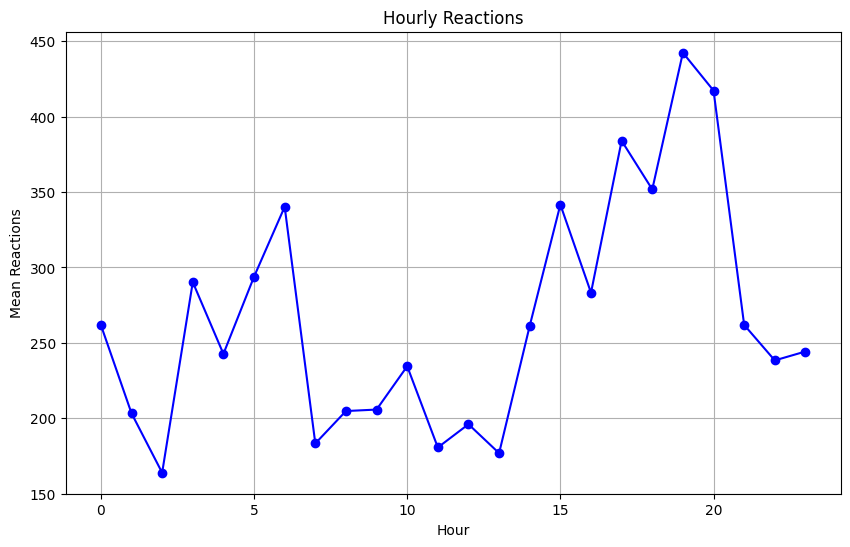

In [ ]:
#grouping the reactions by the hour and calculating the mean
hourly_reactions = X.groupby('hour')['num_reactions'].mean()

#plotting these values as a line plot
plt.figure(figsize=(10,6))
plt.plot(hourly_reactions.index, hourly_reactions.values, marker='o', linestyle='-', color='b')
plt.title('Hourly Reactions')
plt.xlabel('Hour')
plt.ylabel('Mean Reactions')
plt.grid(True)
plt.show()

In [ ]:
correlation = X['hour'].corr(X['num_reactions'], method='spearman')
print("The correlation between the hour of posting and the number of reactions gained: ", correlation)

The correlation between the hour of posting and the number of reactions gained:  0.005364889674976996


In [ ]:
peak_hour = hourly_reactions.idxmax()
print(f"Peak hour for reactions: {peak_hour}:00")

Peak hour for reactions: 19:00


**Analysis**

The number of reactions has an erratic trend throughout the day and depends on the time of posting. It severely drops in the early hours of the day and late hours of the night, considering natural sleep times of a majority of the population.

It sees a steady hike in the morning, with a sudden spike at around 6 a.m., since a lot of people check their phones immediately after they wake up.

Later, there is a drop and the trend is maintained at an almost steady state during the usual work hours. The number again sees a rise in the evening, when most people get off work and spend time on social media, with the highest number being achieved around 7 p.m.

#2. Calculating the correlation between the number of reactions and other engagement metrics

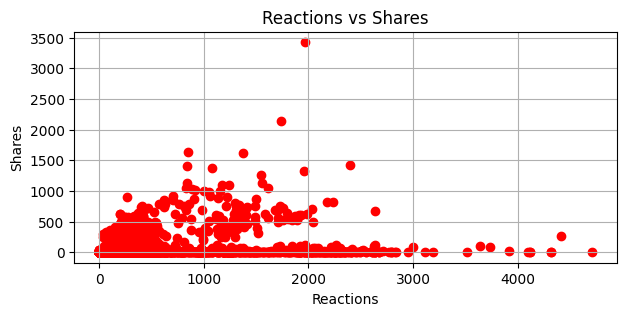

In [ ]:
#determining the type of relationship between num_reactions and num_shares
plt.figure(figsize=(7,3))
plt.scatter(dataset['num_reactions'].values, dataset['num_shares'].values, color='r')
plt.title('Reactions vs Shares')
plt.xlabel('Reactions')
plt.ylabel('Shares')
plt.grid(True)
plt.show()

The above plot shows that the relationship between num_reactions and num_shares is non-linear. Thus, Spearman's correlation is the best suited option

In [ ]:
#Spearman's Correlation
correlation = dataset['num_reactions'].corr(dataset['num_shares'], method='spearman')
print("The correlation between the number of reactions and the number of shares: ", correlation)

The correlation between the number of reactions and the number of shares:  0.5578244237479288


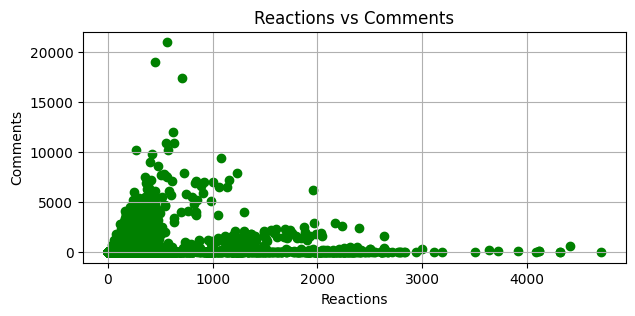

In [ ]:
#determining the type of relationship between num_reactions and num_comments
plt.figure(figsize=(7,3))
plt.scatter(dataset['num_reactions'].values, dataset['num_comments'].values, color='g')
plt.title('Reactions vs Comments')
plt.xlabel('Reactions')
plt.ylabel('Comments')
plt.grid(True)
plt.show()

The above plot shows that the relationship between num_reactions and num_shares is non-linear. Thus, Spearman's correlation is the best suited option

In [ ]:
#Spearman's Correlation
correlation = dataset['num_reactions'].corr(dataset['num_comments'], method='spearman')
print("The correlation between the number of reactions and the number of comments: ", correlation)

The correlation between the number of reactions and the number of comments:  0.7317313718861309


**Analysis**

**Correlation between num_reactions and num_shares: 0.557**

These features have a positive monotonic relationship, indicating that the increase in one feature generally causes an increase in the other, but it need not be a strictly linear relationship.  

**Correlation between num_reactions and num_comments: 0.731**

Indicates a very strong positive monotonic relationship. Increase or decrease in one feature most likely causes a change in the same direction for the other feature as well.

#3. Training a K-Means Clustering Model
#4. Finding the optimal k value using Elbow Method

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# Select and preprocess columns
columns = ['status_type', 'num_reactions', 'num_comments', 'num_shares',
           'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
df_selected = dataset[columns].copy()

# Encode the 'status_type' column
df_selected = pd.get_dummies(df_selected, columns=['status_type'])

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

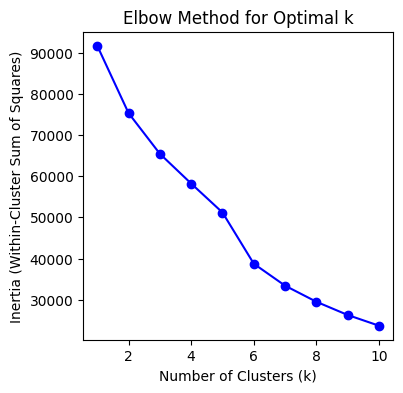

In [ ]:
# Elbow method to determine optimal k
inertia = []
K = range(1, 11)  # Testing k values from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)  # Store the inertia (WCSS)

# Plot the results
plt.figure(figsize=(4, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

Optimal number of clusters = 5

In [ ]:
# Train K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Apply PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [ ]:
# Contributions of each original feature to each PCA component
pca_components = pd.DataFrame(pca.components_, columns=df_selected.columns, index=['PCA Component 1', 'PCA Component 2'])
print(pca_components)


                 num_reactions  num_comments  num_shares  num_likes  \
PCA Component 1       0.253910      0.338451    0.427686   0.213546   
PCA Component 2       0.602895     -0.162594   -0.115821   0.624452   

                 num_loves  num_wows  num_hahas  num_sads  num_angrys  \
PCA Component 1   0.441552  0.263660   0.286702  0.149263     0.21957   
PCA Component 2  -0.066546  0.128772  -0.033303 -0.040318    -0.03665   

                 status_type_link  status_type_photo  status_type_status  \
PCA Component 1         -0.005820          -0.289822           -0.000630   
PCA Component 2          0.042591           0.227152            0.160904   

                 status_type_video  
PCA Component 1           0.302091  
PCA Component 2          -0.319898  


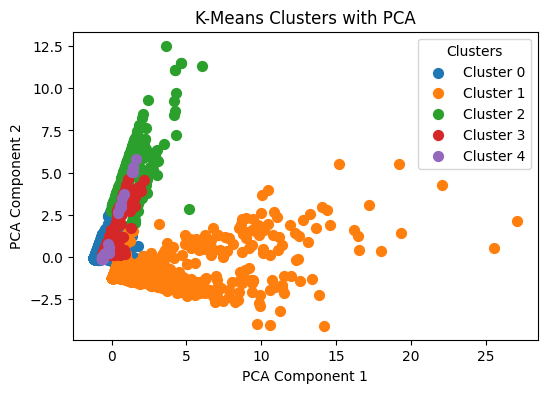

In [ ]:
# Visualize the clusters with PCA components
# Plot each cluster separately to add a legend
plt.figure(figsize=(6, 4))

for cluster_label in np.unique(clusters):
    plt.scatter(
        pca_data[clusters == cluster_label, 0],  # PCA Component 1 for points in this cluster
        pca_data[clusters == cluster_label, 1],  # PCA Component 2 for points in this cluster
        label=f'Cluster {cluster_label}',        # Label for the legend
        s=50
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters with PCA')
plt.legend(title='Clusters')  # Add a legend with the cluster labels
plt.show()

**Analysis**

The required columns were selected from the original dataframe and were scaled and transformed.

The elbow method clearly suggests that the optimal number of clusters is 5.

PCA was used for dimensionality reduction since a huge number of features were used while training the k-means model. Hence the visualization would be very challenging. PCA helps to curb this problem.

The major contributors for PCA Component 1 are the engagement metrics like shares, comments, likes, and reactions like wows, happys, sads, etc. On the other hand, the contributors for PCA Component 2 are the types of posts, like video, photo, link, and status.

The clusters are highly overlapping and hence might imply a lot of shared characteristics between the them.

Cluster 1 - Has high variability, and indicates varied responses for each post of a similar type

Cluster 0 and 2 - Achieves consistent results with the engagement metrics across different types of posts and hence displays stability

Cluster 3 and 4 - Show diversity in engagement metrics, but are probably meant for a niche audience with a preference for specific content type.

Hence, the creators of the posts must analyse why posts in cluster 1 are getting varie reactions and also draw insights from clusters 0 and 2, since they show consistency with respect to the metrics.

#5. Count of different types of Posts

In [ ]:
dataset.groupby('status_type').size()

,0
status_type,
link,63
photo,4288
status,365
video,2334


**Analysis**

Most posts are of the type "Photo", closely followed by "Video". While "Status" is posted a considerable number of times, "Links" are barely used. This highlights the content preferences of the audience.

#6. Average value of num_reaction, num_comments, num_shares for each post type

In [ ]:
reaction_avg = dataset.groupby('status_type')['num_reactions'].mean()
comment_avg = dataset.groupby('status_type')['num_comments'].mean()
share_avg = dataset.groupby('status_type')['num_shares'].mean()

In [ ]:
print("Average value of num_reaction for each post type: ")
print(reaction_avg)
print("\nAverage value of num_comments for each post type: ")
print(comment_avg)
print("\nAverage value of num_shares for each post type: ")
print(share_avg)

Average value of num_reaction for each post type: 
status_type
link      370.142857
photo     181.290345
status    438.783562
video     283.409597
Name: num_reactions, dtype: float64

Average value of num_comments for each post type: 
status_type
link        5.698413
photo      15.993470
status     36.238356
video     642.478149
Name: num_comments, dtype: float64

Average value of num_shares for each post type: 
status_type
link        4.396825
photo       2.553871
status      2.558904
video     115.679949
Name: num_shares, dtype: float64


**Analysis**

Videos are shared the most and also receive the highest number of comments, while links gain the highest number of reactions on an average. The other post types have a consistent number of shares and comments on an average.